Chapter 18

# 体积估算
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码计算并可视化了二维高斯函数

$$
f(x, y) = e^{-x^2 - y^2}
$$

在矩形区域 $[a, b] \times [c, d]$ 上的体积。代码通过两种方法进行计算：

1. **符号积分计算真实体积**：使用符号积分计算 $f(x, y)$ 在给定区域的体积，通过双重积分

   $$
   V = \int_c^d \int_a^b e^{-x^2 - y^2} \, dx \, dy
   $$

   得到的结果即为该区域下函数的真实体积。

2. **数值近似估算体积**：将区域 $[a, b] \times [c, d]$ 划分为多个小矩形，通过 Riemann 和来估算体积。给定不同的网格数量（例如 $5, 10, 15, 20$），计算每个小矩形内函数值 $f(x_i, y_j)$，并累加所有小矩形的体积近似总体积：

   $$
   V_{\text{approx}} = \sum f(x_i, y_j) \cdot \Delta x \cdot \Delta y
   $$

   其中 $\Delta x$ 和 $\Delta y$ 分别表示小矩形的宽度和高度。

通过可视化，代码展示了不同网格数下的三维柱状图，并显示了估算的体积值。随着网格数量增加，数值估算结果逐渐逼近真实体积，从而验证了 Riemann 和在面积或体积近似中的有效性。

## 导入包

In [1]:
from mpl_toolkits.mplot3d import axes3d  # 导入3D绘图工具包
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from sympy.abc import x, y
from sympy import *  # 导入符号计算库

## 定义函数

In [2]:
f_xy = exp(- x**2 - y**2)  # 定义函数 f(x, y) = exp(-x^2 - y^2)
f_xy

exp(-x**2 - y**2)

In [3]:
f_xy_fcn = lambdify([x, y], f_xy)  # 将符号函数转换为数值函数

In [4]:
a = -2; b = 1  # x 的区间
c = -1; d = 2  # y 的区间

x_array_fine = np.linspace(a, b, 300)  # 定义 x 的细致取值范围
y_array_fine = np.linspace(c, d, 300)  # 定义 y 的细致取值范围

xx_fine, yy_fine = np.meshgrid(x_array_fine, y_array_fine)  # 生成网格点
zz_fine = f_xy_fcn(xx_fine, yy_fine)  # 计算函数值

## 可视化函数

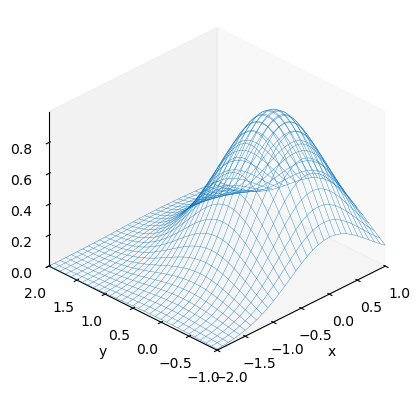

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(xx_fine, yy_fine, zz_fine,
                  color='#0070C0',
                  rstride=10, cstride=10,
                  linewidth=0.25)  # 绘制函数的三维网格图

ax.set_xlabel('x')  # 设置 x 轴标签
ax.set_ylabel('y')  # 设置 y 轴标签
ax.set_zlabel('z = f(x,y)')  # 设置 z 轴标签

ax.set_xlim((a, b))  # 设置 x 轴范围
ax.set_ylim((c, d))  # 设置 y 轴范围
ax.set_zlim((0, zz_fine.max()))  # 设置 z 轴范围
ax.grid(False)
ax.view_init(azim=-135, elev=30)  # 设置视角
ax.set_proj_type('ortho')
plt.show()

## 可视化与估算体积

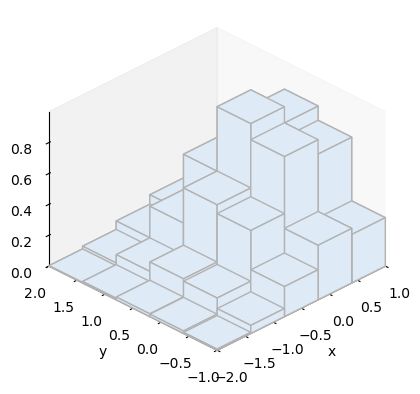

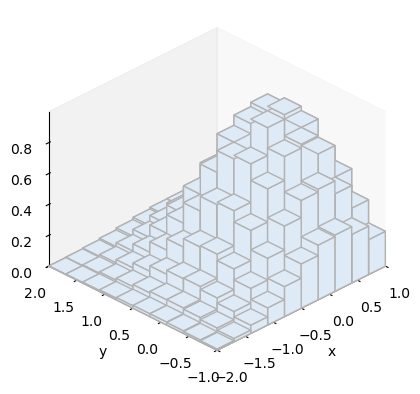

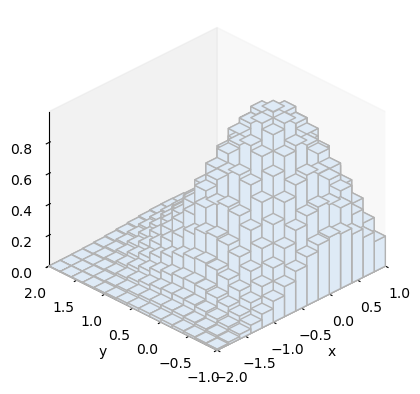

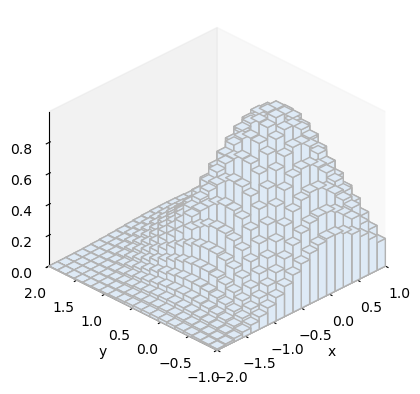

In [6]:
num_array = [5, 10, 15, 20]  # 不同网格数量

for num in num_array:
    
    x_array = np.linspace(a, b - (b - a) / num, num)  # x 的取值
    y_array = np.linspace(c, d - (d - c) / num, num)  # y 的取值
    
    xx, yy = np.meshgrid(x_array, y_array)  # 生成网格点
    xx_array = xx.ravel()  # 将网格点展平
    yy_array = yy.ravel()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    zz_array = np.zeros_like(yy_array)  # 初始化 z 底部位置
    
    dx = np.ones_like(yy_array) / num * (b - a)  # 每个小矩形的宽度 dx
    dy = np.ones_like(yy_array) / num * (d - c)  # 每个小矩形的宽度 dy
    
    dz = f_xy_fcn(xx_array, yy_array)  # 计算矩形的高度
    
    ax.bar3d(xx_array, yy_array, zz_array, dx, dy, dz, shade=False,
              color='#DEEAF6',
              edgecolor='#B2B2B2')  # 绘制小矩形的三维柱状图
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z = f(x,y)')
    
    ax.set_xlim((a, b))
    ax.set_ylim((c, d))
    ax.set_zlim((0, zz_fine.max()))
    ax.grid(False)
    ax.view_init(azim=-135, elev=30)
    ax.set_proj_type('ortho')
    plt.show()

    estimated_volume = dz.sum() * (b - a) / num * (d - c) / num  # 估算体积
    ax.set_title('Estimated volume = %0.3f' % estimated_volume)  # 显示估算体积
    

In [7]:
volume = integrate(f_xy, (y, c, d), (x, a, b))  # 使用符号积分计算真实体积
volume = volume.evalf()  # 转换为数值
print('==== Volume ====')
print(volume)

==== Volume ====
2.65333320473265
